<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_24_Pretrained_Models_ImageNet_Dataset/Lecture_24_Pretrained_Models_ImageNet_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the ResNet50 model with weights trained on ImageNet
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Display a summary of the model architecture
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [4]:
# Display the model object
model

<Functional name=resnet50, built=True>

In [16]:
# Define the image path
img_path = '/content/download.jfif'

# Load and resize the image to the target size (224x224) for the model
img = keras.utils.load_img(img_path, target_size=(224, 224))

# Convert the image to a NumPy array
x = keras.utils.img_to_array(img)

# Expand the dimensions of the array to match the model's expected input shape (add a batch dimension)
x = np.expand_dims(x, axis=0)

# Preprocess the image data for the ResNet50 model
x = preprocess_input(x)

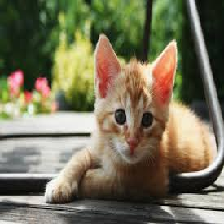

In [17]:
# Display the loaded image
img

In [18]:
# Display the preprocessed image data (NumPy array)
x

array([[[[ -72.939,  -53.779,  -79.68 ],
         [ -74.939,  -55.779,  -81.68 ],
         [ -79.939,  -60.779,  -86.68 ],
         ...,
         [ -92.939,  -94.779, -109.68 ],
         [ -90.939,  -89.779, -107.68 ],
         [ -90.939,  -89.779, -107.68 ]],

        [[ -72.939,  -55.779,  -81.68 ],
         [ -75.939,  -56.779,  -82.68 ],
         [ -78.939,  -61.779,  -87.68 ],
         ...,
         [ -92.939,  -94.779, -109.68 ],
         [ -89.939,  -88.779, -106.68 ],
         [ -88.939,  -87.779, -105.68 ]],

        [[ -73.939,  -58.779,  -84.68 ],
         [ -76.939,  -59.779,  -85.68 ],
         [ -78.939,  -63.779,  -89.68 ],
         ...,
         [ -92.939,  -94.779, -109.68 ],
         [ -87.939,  -86.779, -104.68 ],
         [ -87.939,  -86.779, -104.68 ]],

        ...,

        [[ 111.061,  103.221,   95.32 ],
         [ 115.061,  107.221,   99.32 ],
         [ 111.061,  103.221,   95.32 ],
         ...,
         [ 124.061,  117.221,  109.32 ],
         [ 123.061,  1

In [19]:
# Display the shape of the preprocessed image data
x.shape

(1, 224, 224, 3)

In [20]:
# Make predictions using the loaded model
preds = model.predict(x)

# Decode the top 3 predictions and print them
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
Predicted: [('n02124075', 'Egyptian_cat', np.float32(0.44020185)), ('n04589890', 'window_screen', np.float32(0.045078535)), ('n02356798', 'fox_squirrel', np.float32(0.036847085))]


In [22]:
# Get the top prediction
top_prediction = decode_predictions(preds, top=1)[0][0]

# Assuming the true label is 'Indian_elephant' (This is a placeholder and should be replaced with the actual true label)
true_label = 'download'

# Check if the prediction is accurate by comparing the predicted label with the true label
is_accurate = top_prediction[1] == true_label

# Print the results including the predicted label, true label, and accuracy status
print('Predicted:', top_prediction)
print('True Label:', true_label)
print('Is Accurate:', is_accurate)

Predicted: ('n02124075', 'Egyptian_cat', np.float32(0.44020185))
True Label: download
Is Accurate: False
